In [1]:
# main library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

# display thai language in colab : https://www.facebook.com/groups/colab.thailand/permalink/1421960354645985/
import matplotlib as mpl
plt.rcParams['font.family'] = 'tahoma'
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New', size=10)


# package for downloading file from Google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# authenticate and create the PyDrive client.
# this only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
# download temp file
file_id = '1usLWQZNSuDxEcof5tDdLhAzFaC7s3vwd'
f_dir = 'Fixed_Time.xlsx'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile(f_dir)

In [83]:
!pip install pythainlp
!pip install deepcut
!pip install stop_words
!pip install pytorch
# !pip install attacut

  Using cached https://files.pythonhosted.org/packages/ee/67/f403d4ae6e9cd74b546ee88cccdb29b8415a9c1b3d80aebeb20c9ea91d96/pytorch-1.0.2.tar.gz
  ERROR: Failed building wheel for pytorch
  Running setup.py clean for pytorch
Failed to build pytorch
    Running setup.py install for pytorch ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-kt8v_ont/pytorch/setup.py'"'"'; __file__='"'"'/tmp/pip-install-kt8v_ont/pytorch/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-va5sqca2/install-record.txt --single-version-externally-managed --compile Check the logs for full command output.


In [66]:
import pandas as pd 
import numpy as np
from pythainlp.tokenize import word_tokenize
from pythainlp.tokenize import sent_tokenize
from pythainlp.tag.named_entity import ThaiNameTagger
from pythainlp.tag import pos_tag_sents
import deepcut
from pythainlp.corpus.common import thai_stopwords

In [67]:
import re
import string

def clean_msg(msg):
    
    
    # ลบ text ที่อยู่ในวงเล็บ <> ทั้งหมด
    msg = re.sub(r'<.*?>','', msg)
    
    # ลบ hashtag
    msg = re.sub(r'#','',msg)
    
    # ลบ เครื่องหมายคำพูด (punctuation)
    for c in string.punctuation:
        msg = re.sub(r'\{}'.format(c),'',msg)
    
    # ลบ separator เช่น \n \t
    msg = ' '.join(msg.split())
    
    return msg

In [5]:
df_input = pd.read_excel("Fixed_Time.xlsx")

In [43]:
ner = ThaiNameTagger()

In [84]:
ls_text = [word_tokenize(clean_msg(i),engine="deepcut") for i in df_input["Activity"].tolist()]

In [76]:
ls_text[:10]

[['ตื่นนอน'],
 ['อาบน้ำ'],
 ['กิน', 'อาหาเช้า'],
 ['เดินทาง', 'ด้วย', ' ', 'BTS', ' ', 'ไป', 'ทำ', 'งาน'],
 ['ถึง', 'ที่', 'ทำ', 'งาน', ' ', 'เริ่ม', 'ทำ', 'งาน'],
 ['กิน', 'อาหาเที่ยง'],
 ['กิน', 'กาแฟ'],
 ['เริ่ม', 'ทำ', 'งาน', 'ช่วง', 'บ่าย'],
 ['ประชุม', 'ทีมย่อย'],
 ['ประชุม', 'ทีม', 'ใหญ่']]

In [85]:
from sklearn.feature_extraction.text import CountVectorizer
tokens_list_j = [','.join(tkn) for tkn in ls_text]
cvec = CountVectorizer(analyzer=lambda x:x.split(','))
c_feat = cvec.fit_transform(tokens_list_j)

In [71]:
cvec.vocabulary_

{'': 0,
 ' ': 1,
 ' Korean': 2,
 ' Park': 3,
 ' แปรง': 4,
 '1': 5,
 '101': 6,
 '2': 7,
 '711': 8,
 'Among': 9,
 'Answer': 10,
 'Arrive': 11,
 'Arrived': 12,
 'Attend': 13,
 'BADS': 14,
 'BI': 15,
 'BTS': 16,
 'Back': 17,
 'Bathing': 18,
 'Bed': 19,
 'Big': 20,
 'Black': 21,
 'Breakfast': 22,
 'Brew': 23,
 'C': 24,
 'Call': 25,
 'Cardio': 26,
 'Check': 27,
 'Checking': 28,
 'Clear': 29,
 'CoWorking': 30,
 'Coffee': 31,
 'Compre': 32,
 'Condo': 33,
 'Condos': 34,
 'Conference': 35,
 'Continue': 36,
 'Coordinate': 37,
 'DB': 38,
 'Daily': 39,
 'Deal': 40,
 'Decathlon': 41,
 'Digital': 42,
 'Dinner': 43,
 'Do': 44,
 'Doing': 45,
 'Drive': 46,
 'Dry': 47,
 'Eat': 48,
 'Elearning': 49,
 'Email': 50,
 'FB': 51,
 'Facebook': 52,
 'Family': 53,
 'Feel': 54,
 'Finish': 55,
 'Fitness': 56,
 'Follow': 57,
 'Food': 58,
 'GYM': 59,
 'Games': 60,
 'Gaming': 61,
 'Garden': 62,
 'Generate': 63,
 'Get': 64,
 'Go': 65,
 'Going': 66,
 'Grab': 67,
 'GrabFood': 68,
 'Harvest': 69,
 'Have': 70,
 'Having': 71

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer(analyzer=lambda x:x.split(','),)
t_feat = tvec.fit_transform(tokens_list_j)

In [93]:
transformed_documents_as_array = t_feat.toarray()

In [94]:
for counter, doc in enumerate(transformed_documents_as_array):
    # construct a dataframe
    tf_idf_tuples = list(zip(vectorizer.get_feature_names(), doc))
    one_doc_as_df = pd.DataFrame.from_records(tf_idf_tuples, columns=['term', 'score']).sort_values(by='score', ascending=False).reset_index(drop=True)

    # output to a csv using the enumerated value for the filename

In [96]:
one_doc_as_df

,term,score
0,ยมต,0.749820
1,นทางกล,0.661642
2,101,0.000000
3,นเกมส,0.000000
4,นเดอะซ,0.000000
...,...,...
748,weekly,0.000000
749,weight,0.000000
750,wfh,0.000000
751,whey,0.000000


In [8]:
X = vectorizer.fit_transform(ls_text)
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# vectorizer.get_feature_names()

In [9]:
df_input =df_input.fillna("")

In [ ]:
df_input = df_input[~df_input["Activity"].isnull()]

In [ ]:
df_input.groupby("STU_ID").count().mean().reset_index()

,index,0
0,Time,19.584906
1,Activity,19.584906
2,Pain,15.773585
3,Gain,16.773585
4,Time_Type,19.584906
5,Time_N,19.584906
6,testtttt_goddd,19.584906
7,Time_Cln,19.584906


In [146]:
select = [
          "อาบน้ำ","","แต่งตัว","เตรียมตัว","เล่นเกม","นอน","ตื่น","ออกกำลังกาย","ทำงาน","พักผ่อน","ไปเที่ยว","ดูหนังฟังเพลง","เดินทาง","ทำการบ้าน",
          "เล่นโซเชียล","เตรียมตัว","สังสรรค์","ซื้อของ","ประชุม","กินข้าว","กาแฟ","ชา","เลิกงาน","เรียน","เลิกเรียน","อ่านหนังสือ","เริ่มงาน"
          ]

In [ ]:
replace_lst = ['content', 'และ', 'and', '/', 'เช่น']
def split_text(x, replace_lst = replace_lst):
  x = x.lower()
  x = re.sub(r'\((.+)\)', '', x)
  for w in replace_lst:
    x = x.replace(w, '')
  if ',' in x:
    x = x.replace(' ','')
    lst_text = x.split(',')
  else:
    lst_text = x.split(' ')
  return lst_text

In [100]:
other_interest = df_input[['Activity']]

# ignore punctuation
# other_interest = other_interest[other_interest['Activity'].apply(len)>=2]
other_interest.head(10)

,Activity
0,ตื่นนอน
1,อาบน้ำ
2,กินอาหาเช้า
3,เดินทางด้วย BTS ไปทำงาน
4,ถึงที่ทำงาน เริ่มทำงาน
5,กินอาหาเที่ยง
6,กินกาแฟ
7,เริ่มทำงานช่วงบ่าย
8,ประชุมทีมย่อย
9,ประชุมทีมใหญ่


In [97]:
%tensorflow_version 2.x
!pip install tensorflow_text
import tensorflow_hub as hub
import tensorflow_text
import tensorflow as tf

# download open subtitle EN-TH dataset
!wget http://opus.nlpl.eu/download.php?f=OpenSubtitles/v2018/moses/en-th.txt.zip
!unzip download.php?f=OpenSubtitles%2Fv2018%2Fmoses%2Fen-th.txt.zip -d data

     |████████████████████████████████| 3.4MB 5.3MB/s 
--2021-02-05 17:20:11--  http://opus.nlpl.eu/download.php?f=OpenSubtitles/v2018/moses/en-th.txt.zip
Resolving opus.nlpl.eu (opus.nlpl.eu)... 193.166.25.9
Connecting to opus.nlpl.eu (opus.nlpl.eu)|193.166.25.9|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://object.pouta.csc.fi/OPUS-OpenSubtitles/v2018/moses/en-th.txt.zip [following]
--2021-02-05 17:20:12--  https://object.pouta.csc.fi/OPUS-OpenSubtitles/v2018/moses/en-th.txt.zip
Resolving object.pouta.csc.fi (object.pouta.csc.fi)... 86.50.254.18, 86.50.254.19
Connecting to object.pouta.csc.fi (object.pouta.csc.fi)|86.50.254.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 119520928 (114M) [application/zip]
Saving to: ‘download.php?f=OpenSubtitles%2Fv2018%2Fmoses%2Fen-th.txt.zip’

download.php?f=Open 100%[===================>] 113.98M  23.5MB/s    in 5.7s    

2021-02-05 17:20:19 (19.8 MB/s) - ‘download.php?f=OpenSubti

In [98]:
# create USE embedding by using tensorflow hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual/3")

In [101]:
emb_other_interest = embed(other_interest['Activity'].values).numpy()
df_emb_oth_interest = pd.DataFrame(
                                    emb_other_interest,
                                    index = other_interest['Activity'].values
                                  )
# df_emb_oth_interest['type'] = 'original'
df_emb_oth_interest.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511
ตื่นนอน,0.130226,-0.017252,0.041384,0.034525,0.001668,0.003773,-0.043187,0.041091,-0.031660,-0.060414,-0.011846,-0.012940,-0.041913,-0.035198,-0.025288,0.063301,0.087964,-0.051921,0.058122,0.005987,0.000116,0.071800,0.009986,0.080080,0.000017,-0.083838,0.015824,-0.010126,-0.019608,0.024868,-0.013277,-0.018880,-0.035001,-0.059827,0.010203,-0.023487,0.018447,-0.009568,0.025477,0.000258,...,0.025214,0.014447,-0.015620,-0.012937,-0.018026,0.050063,0.072569,0.008521,-0.056328,0.110459,0.041178,0.011677,-0.037079,-0.047009,0.060706,-0.085703,0.012617,-0.064257,-0.069901,-0.004701,-0.014270,-0.004055,-0.018372,-0.004485,-0.053550,0.024904,-0.050118,-0.029272,0.002922,-0.019302,-0.077609,0.023719,0.044464,-0.011172,0.046357,-0.023647,-0.111532,0.013817,0.012612,0.008993
อาบน้ำ,0.128401,-0.073663,0.001114,0.065628,-0.049385,0.039824,0.064889,0.019101,-0.034924,-0.017390,-0.035882,0.008664,-0.100204,-0.007635,-0.038978,0.045952,0.012379,-0.034927,0.037926,0.002790,0.034859,0.041625,-0.015737,0.010564,-0.073885,-0.028984,0.011334,0.017839,0.010065,-0.063247,0.035657,-0.062857,-0.019253,-0.059247,-0.028499,-0.021315,0.080901,0.034362,0.003263,0.052237,...,0.045843,0.040721,0.026559,-0.010633,0.008922,-0.009077,0.007929,-0.028332,-0.002242,0.095398,0.017029,0.026515,0.021570,-0.058880,0.015229,-0.101011,-0.024082,0.023737,0.052905,0.015630,0.027702,-0.018105,-0.017046,-0.002307,-0.014784,0.031607,-0.019185,-0.006804,0.012631,-0.055855,-0.091371,-0.040101,0.026252,-0.012906,0.049683,0.055259,0.008577,0.008867,-0.042374,0.007077
กินอาหาเช้า,0.059601,0.025132,0.027225,-0.000634,-0.029179,0.052936,0.015377,0.052607,-0.033214,0.007006,-0.056662,-0.044753,-0.038194,-0.063299,-0.015904,0.088589,0.045697,-0.061218,0.067813,-0.054514,0.049384,-0.004149,-0.036490,-0.001532,-0.073629,-0.038683,0.042687,0.008853,0.027637,0.026539,0.031964,-0.110952,-0.026992,-0.054752,0.075195,-0.010815,0.037536,-0.025745,0.029462,-0.015483,...,-0.034800,0.056912,-0.008493,-0.030497,0.040576,-0.034983,0.049605,0.052282,-0.034357,0.095884,0.069834,-0.050313,-0.038903,-0.038487,-0.003235,-0.062158,-0.003818,-0.015671,-0.014599,0.025874,0.021594,0.006564,0.024105,0.059004,0.051443,-0.011527,-0.046088,-0.076247,-0.022727,0.042474,-0.044679,-0.007891,0.053224,-0.001334,-0.019756,-0.023553,-0.074854,-0.004949,0.009752,-0.004716
เดินทางด้วย BTS ไปทำงาน,0.063399,-0.010301,0.048501,0.038580,-0.046895,0.060612,-0.045399,0.056511,-0.023540,0.065368,-0.027599,-0.035434,-0.072488,0.051521,0.015427,-0.009624,-0.056461,0.071725,-0.030078,-0.073073,0.038631,-0.016057,-0.018232,-0.058369,-0.006329,-0.049185,-0.048068,-0.001295,0.068924,0.050817,0.003004,-0.059801,0.073646,-0.032526,-0.000364,0.018851,0.015765,-0.088676,0.053968,-0.004071,...,0.039559,-0.004397,-0.014784,-0.003812,-0.052337,-0.087488,0.066803,-0.056785,0.018534,0.009908,0.072642,-0.050183,0.013091,0.033717,-0.031484,-0.039849,0.009638,-0.027543,-0.017937,-0.056303,0.046755,-0.038529,0.052531,0.053719,-0.014653,0.001704,-0.046203,0.063985,-0.014779,0.001791,0.032562,-0.073068,0.024850,0.028876,-0.002733,0.075946,0.028227,0.025461,0.033368,0.015822
ถึงที่ทำงาน เริ่มทำงาน,0.077211,0.023803,0.028884,0.012257,-0.050095,-0.054400,0.000693,-0.004517,0.018053,0.016987,0.002159,0.012481,-0.003977,-0.046706,0.015396,-0.012252,-0.018994,-0.036485,-0.050315,-0.071889,0.076008,-0.032299,0.022841,-0.002507,0.011721,-0.027201,-0.000477,-0.017811,0.031583,-0.000933,0.075770,-0.056329,-0.027574,-0.037547,0.041190,0.026285,-0.022795,-0.020683,0.063797,-0.012937,...,0.000157,-0.001492,-0.022500,-0.017956,0.001683,0.030927,0.040106,0.010540,-0.094526,0.087001,0.021976,0.035113,-0.067931,-0.032976,-0.020240,0.036090,0.026707,-0.093091,0.013036,0.027500,-0.011558,0.06250

In [147]:
# create df which contains embedded vector of selected category
df_emb_category = pd.DataFrame(
                                embed(select).numpy(), 
                                index = select
                               )
df_emb_category.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511
อาบน้ำ,0.128401,-0.073663,0.001114,0.065628,-0.049385,0.039824,0.064889,0.019101,-0.034924,-0.017390,-0.035882,0.008664,-0.100204,-0.007635,-0.038978,0.045952,0.012379,-0.034927,0.037926,0.002790,0.034859,0.041625,-0.015737,0.010564,-0.073885,-0.028984,0.011334,0.017839,0.010065,-0.063247,0.035657,-0.062857,-0.019253,-0.059247,-0.028499,-0.021315,0.080901,0.034362,0.003263,0.052237,...,0.045843,0.040721,0.026559,-0.010633,0.008922,-0.009077,0.007929,-0.028332,-0.002242,0.095398,0.017029,0.026515,0.021570,-0.058880,0.015229,-0.101011,-0.024082,0.023737,0.052905,0.015630,0.027702,-0.018105,-0.017046,-0.002307,-0.014784,0.031607,-0.019185,-0.006804,0.012631,-0.055855,-0.091371,-0.040101,0.026252,-0.012906,0.049683,0.055259,0.008577,0.008867,-0.042374,0.007077
,0.113856,0.034398,-0.006175,0.004900,-0.022477,0.018768,0.031511,0.046432,-0.002459,-0.002604,-0.009886,-0.038638,0.080209,-0.042361,-0.087995,-0.050095,0.015845,0.107457,0.030547,0.091331,-0.033574,0.113801,0.046039,-0.014919,0.067701,-0.016054,0.050952,-0.051625,-0.025408,0.005544,0.029900,0.035108,0.057384,-0.035775,0.002374,-0.081888,-0.018261,-0.016812,0.028970,-0.053918,...,0.008618,0.064542,0.087916,0.019664,0.025324,0.034898,0.026080,0.047923,-0.044918,0.113457,0.057145,-0.040742,-0.056921,-0.019982,0.060833,-0.097313,0.012628,0.041443,-0.052818,0.007899,0.011590,0.049663,-0.022196,-0.066103,0.002505,0.010654,0.027872,0.061267,0.013931,-0.052028,-0.084821,-0.006131,0.005688,-0.031894,-0.040800,-0.048821,0.012664,0.102129,-0.035429,0.014589
แต่งตัว,0.129277,0.006934,0.023838,0.009413,-0.004681,0.020626,-0.024494,0.007246,-0.051176,-0.043274,-0.045255,0.133371,-0.071886,-0.073214,0.028963,-0.040982,-0.001724,-0.040633,0.077874,0.053884,0.040732,0.091598,-0.029581,-0.034640,-0.015253,0.037933,0.051936,0.045121,0.031179,0.004016,-0.007361,-0.047628,0.044853,-0.053833,-0.038021,0.017696,0.037480,0.049284,0.018211,0.026865,...,-0.014538,-0.017402,0.000601,-0.020041,-0.016659,0.013290,0.020538,-0.001062,-0.004243,0.084881,0.026846,0.008865,-0.045133,-0.021356,0.025298,-0.077708,0.011776,0.010965,-0.046792,0.033005,-0.037929,-0.014369,-0.068926,-0.009382,-0.042781,0.028946,0.019093,0.050278,-0.020937,0.064966,-0.108013,-0.065285,0.046551,-0.086833,-0.033783,-0.000374,0.031248,0.052142,0.010921,-0.026964
เตรียมตัว,0.131161,-0.050189,0.040564,0.041357,-0.022878,0.005367,-0.033801,0.061294,0.017214,-0.047265,-0.018964,0.016168,-0.039506,-0.019061,-0.073262,-0.042826,-0.013598,-0.025825,-0.002028,-0.014827,-0.061703,0.086881,0.049722,0.032129,-0.006097,0.017136,0.037323,0.072928,0.001723,-0.002014,0.008046,0.032403,0.025339,-0.033712,0.006343,-0.049375,-0.021062,0.060442,0.024664,0.042577,...,0.014336,-0.008589,0.005663,0.004661,0.020070,0.014533,-0.011990,-0.079256,-0.021687,0.119103,0.036583,0.077657,-0.006678,0.068621,-0.007462,-0.084364,-0.056887,0.026092,-0.030296,0.007156,0.040778,-0.042654,0.028159,0.042321,0.003882,-0.065195,-0.087451,0.017679,0.019529,0.025566,-0.039916,-0.000871,-0.007078,-0.056971,0.000547,0.020962,0.041805,0.036054,0.078700,-0.042419
เล่นเกม,0.074731,0.000429,0.018504,-0.021108,0.053628,0.001761,0.006808,0.000005,-0.037529,0.016451,-0.000591,-0.035683,-0.011392,-0.009408,0.044035,0.011261,-0.012354,-0.042566,0.014366,0.048027,0.008877,0.011906,-0.016652,0.021955,-0.062751,-0.039814,0.039196,-0.024441,0.063997,0.075227,0.023707,0.018956,0.012781,-0.050531,0.022443,0.020621,-0.010308,0.000203,0.045477,0.064115,...,0.123854,-0.062930,-0.043027,-0.009549,0.032097,-0.040378,0.021482,0.026907,-0.020176,0.117375,-0.026606,0.049337,-0.112197,-0.039796,-0.033512,-0.051461,-0.044579,0.018631,-0.059101,-0.124240,-0.012822,0.041795,-0.036916,0.002897,-0.011145,-0.011412,0.023243,-0.034955,-0

In [148]:
from sklearn.metrics.pairwise import cosine_similarity
col_cate = df_emb_category.index
cosim = cosine_similarity(df_emb_oth_interest,df_emb_category)
ls_result = pd.DataFrame({col_cate[i]:cosim[:,i] for i in range(cosim.shape[1])}).idxmax('columns').values

In [149]:
sml = pd.DataFrame({col_cate[i]:cosim[:,i] for i in range(cosim.shape[1])}).max(axis = 1)

In [150]:
ls_result

array(['ตื่น', 'อาบน้ำ', 'กินข้าว', ..., 'เล่นโซเชียล', 'ดูหนังฟังเพลง',
       'นอน'], dtype=object)

In [151]:
# argmax_category = df_emb_oth_interest.dot(df_emb_category.T).idxmax('columns').values
df_result = pd.DataFrame({
                        'original_text' : df_emb_oth_interest.index,
                        'category' : ls_result,
                        'Similarity_score' : sml
                      })
df_result[df_result["Similarity_score"] <= 0.2].sort_values("Similarity_score")

,original_text,category,Similarity_score
256,เปิดอีเมล์ ตอบเมล์ Support ลูกค้า,ซื้อของ,0.067907
428,เปิด LINE MAN หาของกินแล้วก็ปิดไป,กินข้าว,0.092324
573,ไปห้อง MD เซ็นต์เอกสาร,ประชุม,0.100250
554,ไปห้อง MD เซ็นต์เอกสาร,ประชุม,0.100250
518,เข้าไลน์การผลิต เพื่อเทสตัวงานให้ลูกค้า,เริ่มงาน,0.107900
296,Work on a Python script that fetches data from...,ทำงาน,0.110810
81,เปิดอีเมล์ ตอบอีเมล์,ตื่น,0.120263
381,ไปรับ requirement ใหม่จาก user,เตรียมตัว,0.130529
258,วิเคราะห์ สรุปเอกสาร Requirement,อ่านหนังสือ,0.132792
899,ติดตามสถานะงานของวันนี้ ตามแผนที่ได้วางไว้,ไปเที่ยว,0.151675


In [152]:
pd.concat([df_input,df_result],axis=1).to_excel("Group_Data_Activity.xlsx",index=False)

In [ ]:
df_emb_oth_interest2 = df_emb_oth_interest.copy()
df_emb_category2 = df_emb_category.copy()
# add original type to index
df_emb_oth_interest2.index = [ i+'_O' for i in df_emb_oth_interest2.index ]

# add category type to index
df_emb_category2.index = [ i+'_C' for i in df_emb_category2.index ]

df_emb_all = pd.concat([df_emb_oth_interest2,df_emb_category2], axis = 0)
df_emb_all
argmax_category_all = df_emb_all.dot(df_emb_category.T).idxmax('columns').values
argmax_category_all


array(['ตื่น', 'อาบน้ำ', 'กินข้าว', ..., 'เลิกงาน', 'เรียน', 'เลิกเรียน'],
      dtype=object)

In [ ]:
from sklearn.decomposition import PCA
n_component = 2
pca = PCA(n_components = n_component)
df_pca = pca.fit_transform(df_emb_all)
df_pca = pd.DataFrame(
                        df_pca,
                        columns = [ f'pc{i+1}' for i in range(n_component)],
                      )
df_pca['text'] = df_emb_all.index
df_pca['category'] = argmax_category_all
df_pca[['text','type']] = df_pca['text'].str.split('_',expand = True)
df_pca['type'] = df_pca['type'].replace({'O' : 'original_text', 'C' : 'category'})

df_pca.head()

,pc1,pc2,text,category,type
0,-0.290490,-0.299728,ตื่นนอน,ตื่น,original_text
1,-0.460096,-0.411641,อาบน้ำ,อาบน้ำ,original_text
2,-0.338818,0.147895,กินอาหาเช้า,กินข้าว,original_text
3,0.330423,0.142437,เดินทางด้วย BTS ไปทำงาน,เดินทาง,original_text
4,0.625953,-0.101971,ถึงที่ทำงาน เริ่มทำงาน,ทำงาน,original_text


In [ ]:
df_pca2 = df_pca[df_pca['category'].isin(select[0:5])]
df_pca2.reset_index(drop=True,  inplace = True)
df_pca2

,pc1,pc2,text,category,type
0,-0.290490,-0.299728,ตื่นนอน,ตื่น,original_text
1,-0.460096,-0.411641,อาบน้ำ,อาบน้ำ,original_text
2,-0.460096,-0.411642,อาบน้ำ,อาบน้ำ,original_text
3,-0.387162,-0.374206,นอน,นอน,original_text
4,-0.290491,-0.299727,ตื่นนอน,ตื่น,original_text
...,...,...,...,...,...
280,-0.042871,-0.110636,แต่งตัว,แต่งตัว,category
281,0.004542,-0.050871,เตรียมตัว,เตรียมตัว,category
282,-0.387162,-0.374206,นอน,นอน,category
283,-0.190940,-0.248528,ตื่น,ตื่น,category


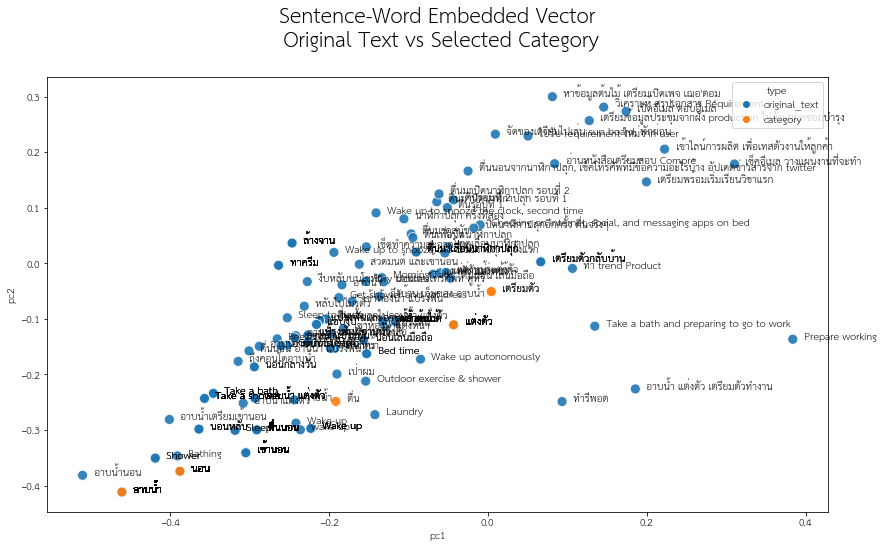

In [ ]:
fig, ax = plt.subplots(figsize=(14,8))
sns.scatterplot(x='pc1', y='pc2', data = df_pca2, hue = 'type', s = 100, alpha = 0.9)

for i in range(len(df_pca2)):
  label = df_pca2.loc[i, 'text']
  pc1 = df_pca2.loc[i, 'pc1']
  pc2 = df_pca2.loc[i, 'pc2']
  ax.annotate(f' {label}', xy = (pc1+0.01, pc2))

plt.title('Sentence-Word Embedded Vector\n Original Text vs Selected Category\n', size = 20)
plt.show()

In [ ]:
df_input["Label"] = df_result["category"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_input.to_excel("Fixe_Time_Label.xlsx",index=False)